<a href="https://colab.research.google.com/github/mahmoudsayd/coronavirus_dashborad/blob/main/corona_Dataset_preprocessing_%26_visualization_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_1 = pd.read_csv('/content/covid_19_clean_complete.csv')
data_2 = pd.read_csv('/content/country_wise_latest.csv')
data_3 = pd.read_csv('/content/day_wise.csv')
data_4 = pd.read_csv('/content/usa_county_wise.csv')
data_5 = pd.read_csv('/content/worldometer_data.csv')
data_6 = pd.read_csv('/content/full_grouped.csv')

# Data_1 info

In [ ]:
data_1.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data_1.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
data_1.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
data_1.shape

(49068, 10)

In [ ]:
data_1.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
data_1.duplicated().sum()

0

In [ ]:
def replace_outliers(df, column):

    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].apply(lambda x: df[column].median() if x < lower_bound or x > upper_bound else x)

    return df

In [ ]:
covid_19_clean_complete = replace_outliers(data_1, 'Confirmed')

covid_19_clean_complete = replace_outliers(data_1, 'Deaths')

covid_19_clean_complete = replace_outliers(data_1, 'Recovered')

covid_19_clean_complete = replace_outliers(data_1, 'Active')

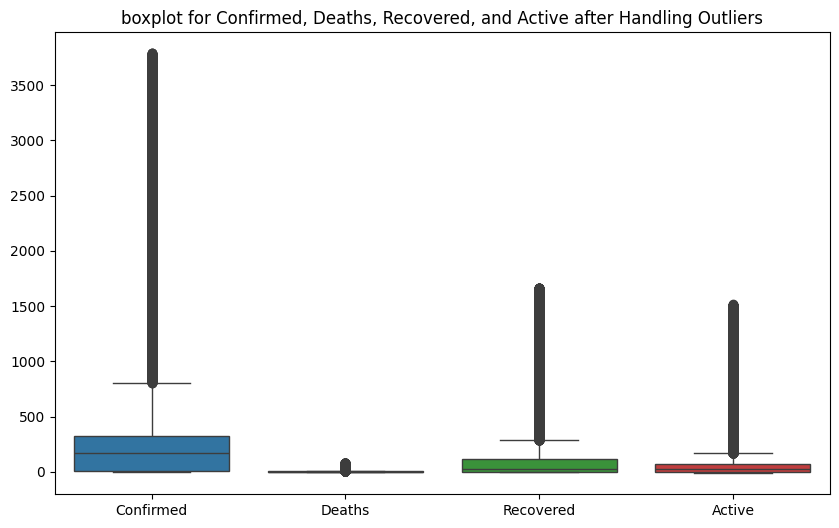

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']])

plt.title('boxplot for Confirmed, Deaths, Recovered, and Active after Handling Outliers')

plt.show()

In [ ]:
#data_1 is clean

# Data_1 visualization

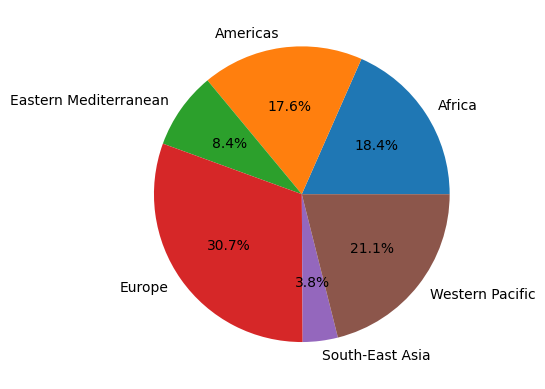

In [ ]:
pp=data_1.groupby('WHO Region')['Deaths'].count()
plt.pie(pp,labels=pp.index,autopct='%1.1f%%')
plt.show()

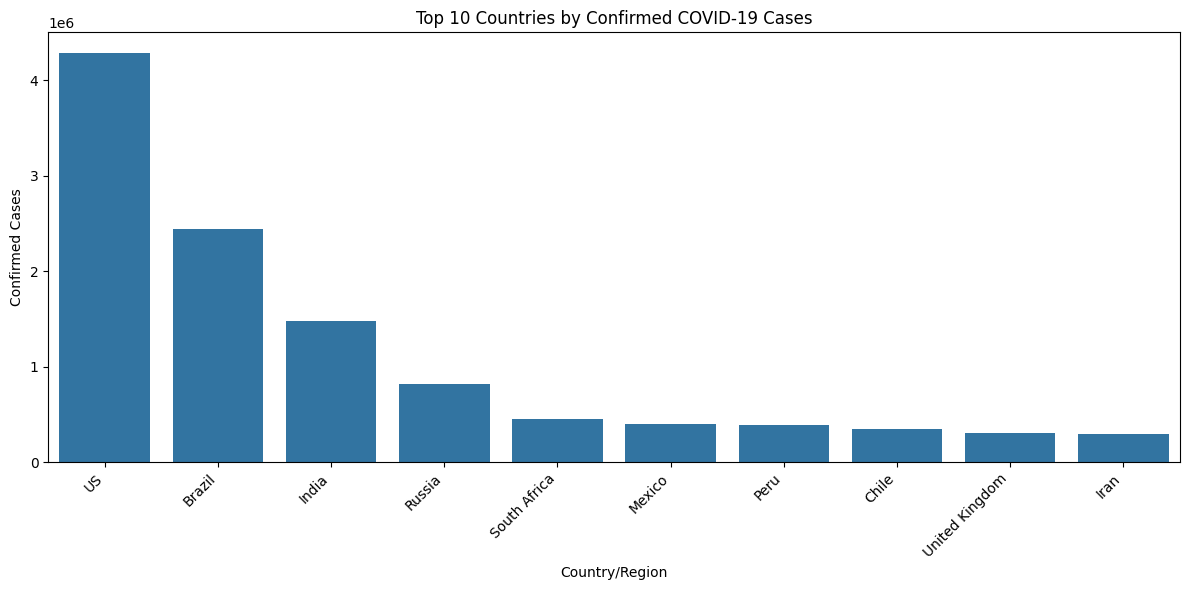

In [ ]:

# Plotting top 10 countries by confirmed cases
top_10_countries = data_2.nlargest(10, 'Confirmed')

plt.figure(figsize=(12, 6))
sns.barplot(x='Country/Region', y='Confirmed', data=top_10_countries)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

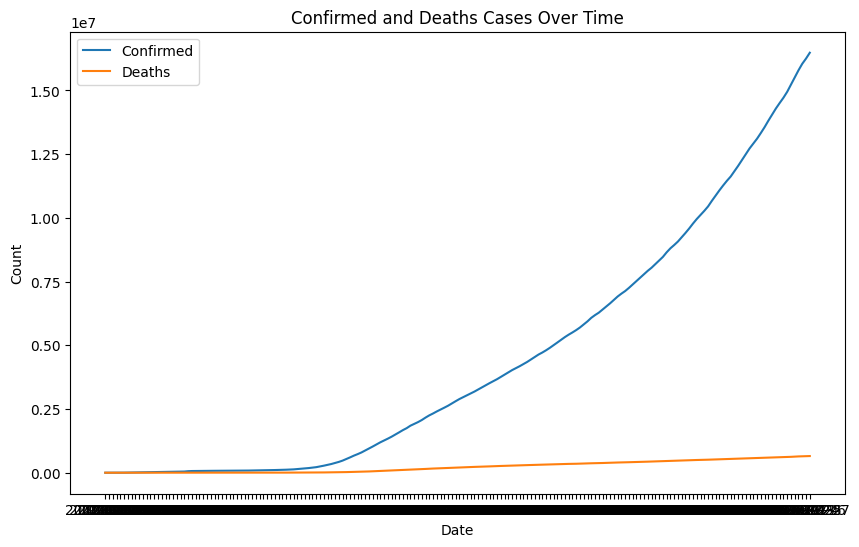

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=data_3, label='Confirmed')
sns.lineplot(x='Date', y='Deaths', data=data_3, label='Deaths')
plt.title('Confirmed and Deaths Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

Text(0, 0.5, 'Count')

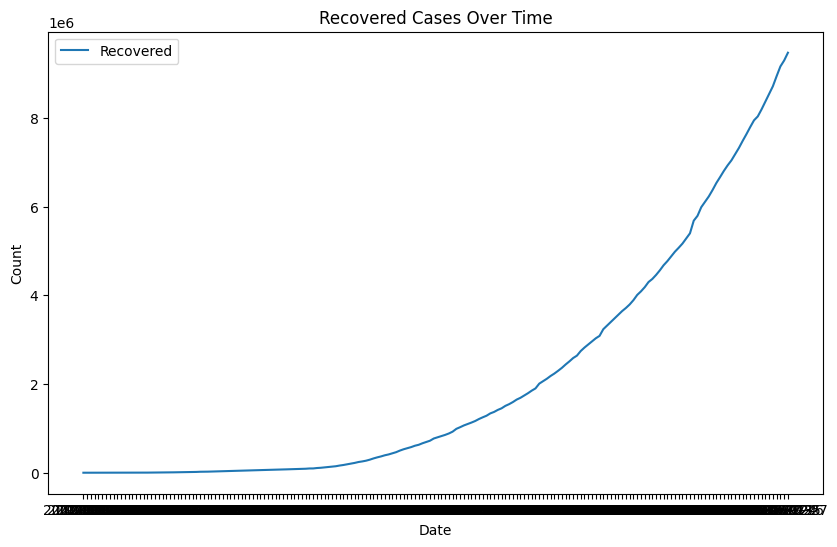

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Recovered', data=data_3, label='Recovered')
plt.title('Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

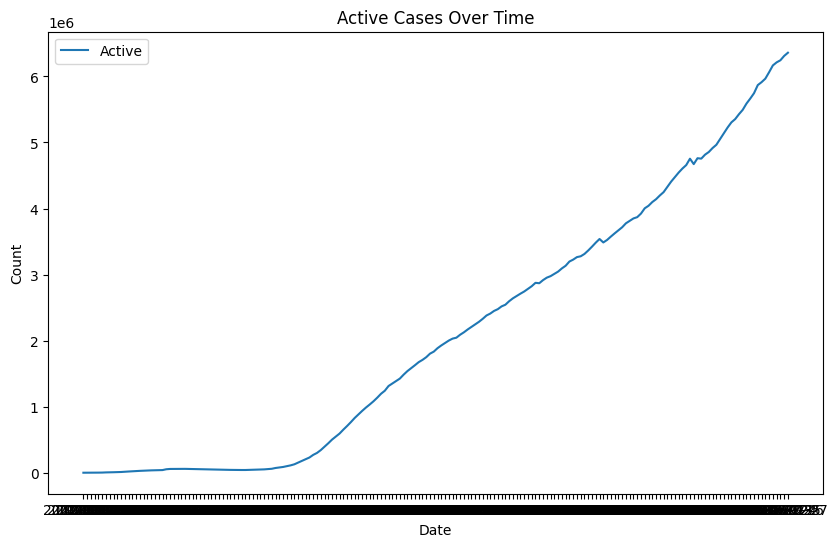

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Active', data=data_3, label='Active')
plt.title('Active Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

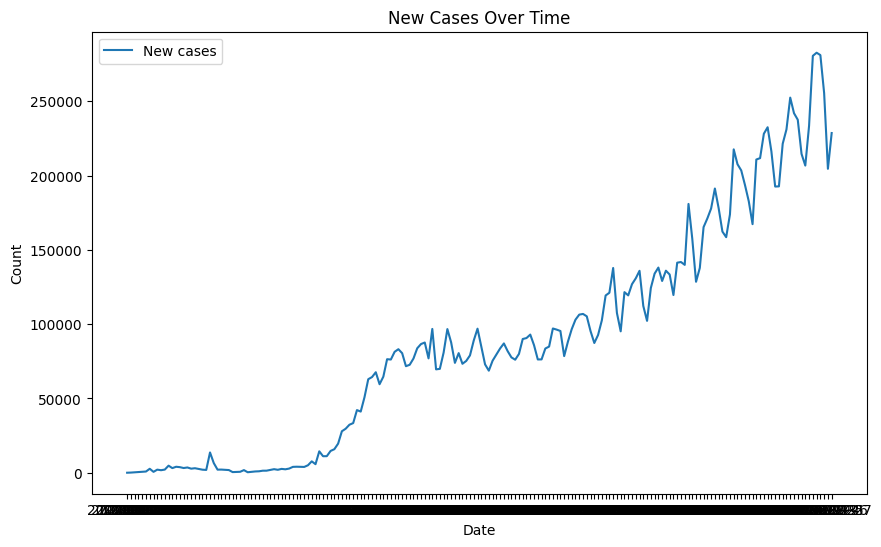

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='New cases', data=data_3, label='New cases')
plt.title('New Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

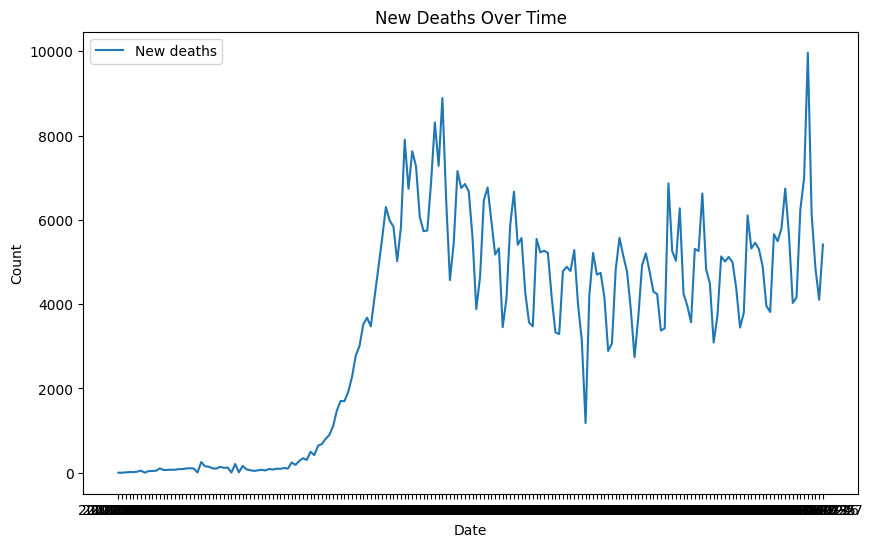

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='New deaths', data=data_3, label='New deaths')
plt.title('New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')

Text(0.5, 0, 'Date')

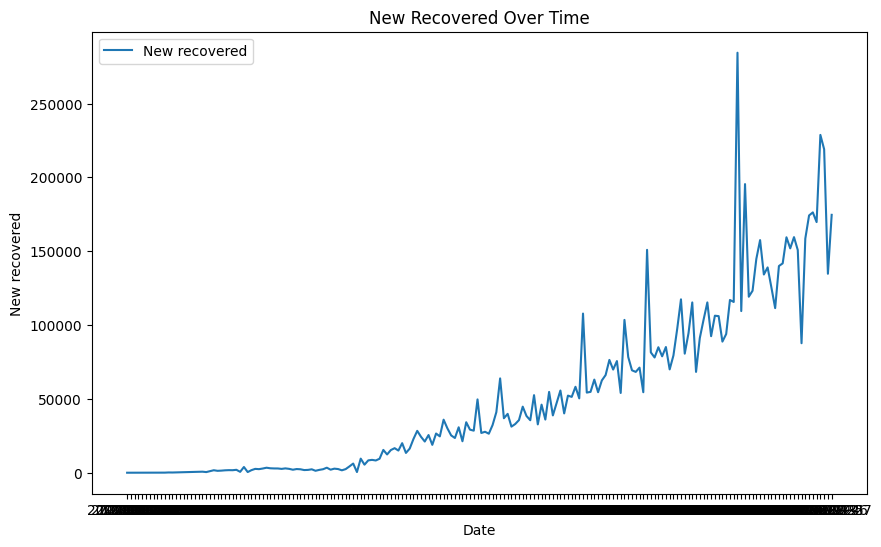

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='New recovered', data=data_3, label='New recovered')
plt.title('New Recovered Over Time')
plt.xlabel('Date')

In [ ]:
# Reshape the data for plotly.express
melted_data = data_3.melt(id_vars=['Date'],
                          value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered'],
                          var_name='Category', value_name='Count')

# Create the line plot using plotly.express
fig = px.line(melted_data, x='Date', y='Count', color='Category',
              title='COVID-19 Data Over Time',
              labels={
                  'Date': 'Date',
                  'Count': 'Count',
                  'Category': 'Case Type'
              })

# Update the layout for better visualization
fig.update_layout(
    width=1000,
    height=600,
    legend_title='Case Type'
)

# Display the figure
fig.show()

In [ ]:
# Plotting top 10 countries by deaths using plotly.express
top_10_deaths_px = data_2.nlargest(10, 'Deaths')

fig = px.bar(top_10_deaths_px, x='Country/Region', y='Deaths', title='Top 10 Countries by Deaths')
fig.show()

# Data_2 info

In [ ]:
data_2.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [ ]:
data_2.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa
186,Zimbabwe,2704,36,542,2126,192,2,24,1.33,20.04,6.64,1713,991,57.85,Africa


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
data_2.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [ ]:
data_2.shape

(187, 15)

In [ ]:
data_2.isnull().sum()

,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
data_1.duplicated().sum()

0

In [ ]:
#data_2 is clean

# Data_2 visualization

In [ ]:
# Calculate Mortality Rate
data_2['Mortality Rate'] = data_2['Deaths'] / data_2['Confirmed']

# Sort by Mortality Rate and get top 10
top_10_mortality = data_2.nlargest(10, 'Mortality Rate')

# Plotting using plotly express
fig = px.bar(top_10_mortality, x='Country/Region', y='Mortality Rate',
             title='Top 10 Countries by Mortality Rate',
             labels={'Mortality Rate': 'Mortality Rate (Deaths/Confirmed)'},
             color_discrete_sequence=px.colors.qualitative.Set1)
fig.show()

In [ ]:
def plot_hbar(df, col, n, hover_data=[]):
    fig = px.bar(df.sort_values(col).tail(n),
                 x=col, y="Country/Region", color='WHO Region',
                 text=col, orientation='h', width=700, hover_data=hover_data,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col, xaxis_title="", yaxis_title="",
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

In [ ]:
plot_hbar(data_2, 'Deaths', 15)

In [ ]:
plot_hbar(data_2, 'Active', 15)

In [ ]:
plot_hbar(data_2, 'Confirmed', 15)

In [ ]:
plot_hbar(data_2, 'Recovered', 15)

In [ ]:
def plot_treemap(col):
    fig = px.treemap(data_2, path=["Country/Region"], values=col, height=700,
                 title=col, color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.data[0].textinfo = 'label+text+value'
    fig.show()

In [ ]:
plot_treemap('Confirmed')

In [ ]:
plot_treemap('Deaths')

In [ ]:
def plot_map(df, col, pal):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country/Region", locationmode='country names',
                  color=col, hover_name="Country/Region",
                  title=col, hover_data=[col], color_continuous_scale=pal)
#     fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [ ]:
plot_map(data_2, 'Deaths', 'matter')

# Data_3 info

In [ ]:
data_3.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [ ]:
data_3.tail()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187
187,2020-07-27,16480485,654036,9468087,6358362,228693,5415,174623,3.97,57.45,6.91,187


In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [ ]:
data_3.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [ ]:
data_3.shape

(188, 12)

In [ ]:
data_3.isnull().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


In [ ]:
data_3.duplicated().sum()

0

In [ ]:
#data_3 is clean

# Data_3 visualization

# Data_4 info

In [ ]:
data_4.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,63072001,PR,PRI,630,72001.0,Adjuntas,Puerto Rico,US,18.180117,-66.754367,"Adjuntas, Puerto Rico, US",1/22/20,0,0
4,63072003,PR,PRI,630,72003.0,Aguada,Puerto Rico,US,18.360255,-67.175131,"Aguada, Puerto Rico, US",1/22/20,0,0


In [ ]:
data_4.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
627915,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/27/20,347,1
627916,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/27/20,70,0
627917,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/27/20,2781,23
627918,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/27/20,142,0
627919,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/27/20,2375,24


In [ ]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627920 entries, 0 to 627919
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   UID             627920 non-null  int64  
 1   iso2            627920 non-null  object 
 2   iso3            627920 non-null  object 
 3   code3           627920 non-null  int64  
 4   FIPS            626040 non-null  float64
 5   Admin2          626792 non-null  object 
 6   Province_State  627920 non-null  object 
 7   Country_Region  627920 non-null  object 
 8   Lat             627920 non-null  float64
 9   Long_           627920 non-null  float64
 10  Combined_Key    627920 non-null  object 
 11  Date            627920 non-null  object 
 12  Confirmed       627920 non-null  int64  
 13  Deaths          627920 non-null  int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 67.1+ MB


In [ ]:
data_4.shape

(627920, 14)

In [ ]:
data_4.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,6.279200e+05,627920.000000,626040.000000,627920.000000,627920.000000,627920.000000,627920.000000
mean,8.342958e+07,834.491617,33061.684685,36.707212,-88.601474,357.284285,17.536328
std,4.314702e+06,36.492620,18636.156825,9.061572,21.715747,3487.282694,300.991466
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000
25%,8.401811e+07,840.000000,19079.000000,33.895587,-97.790204,0.000000,0.000000
50%,8.402921e+07,840.000000,31014.000000,38.002344,-89.486710,4.000000,0.000000
75%,8.404612e+07,840.000000,47131.000000,41.573069,-82.311265,63.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,224051.000000,23500.000000


In [ ]:
data_4.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,1880
Admin2,1128
Province_State,0
Country_Region,0
Lat,0
Long_,0


<Axes: >

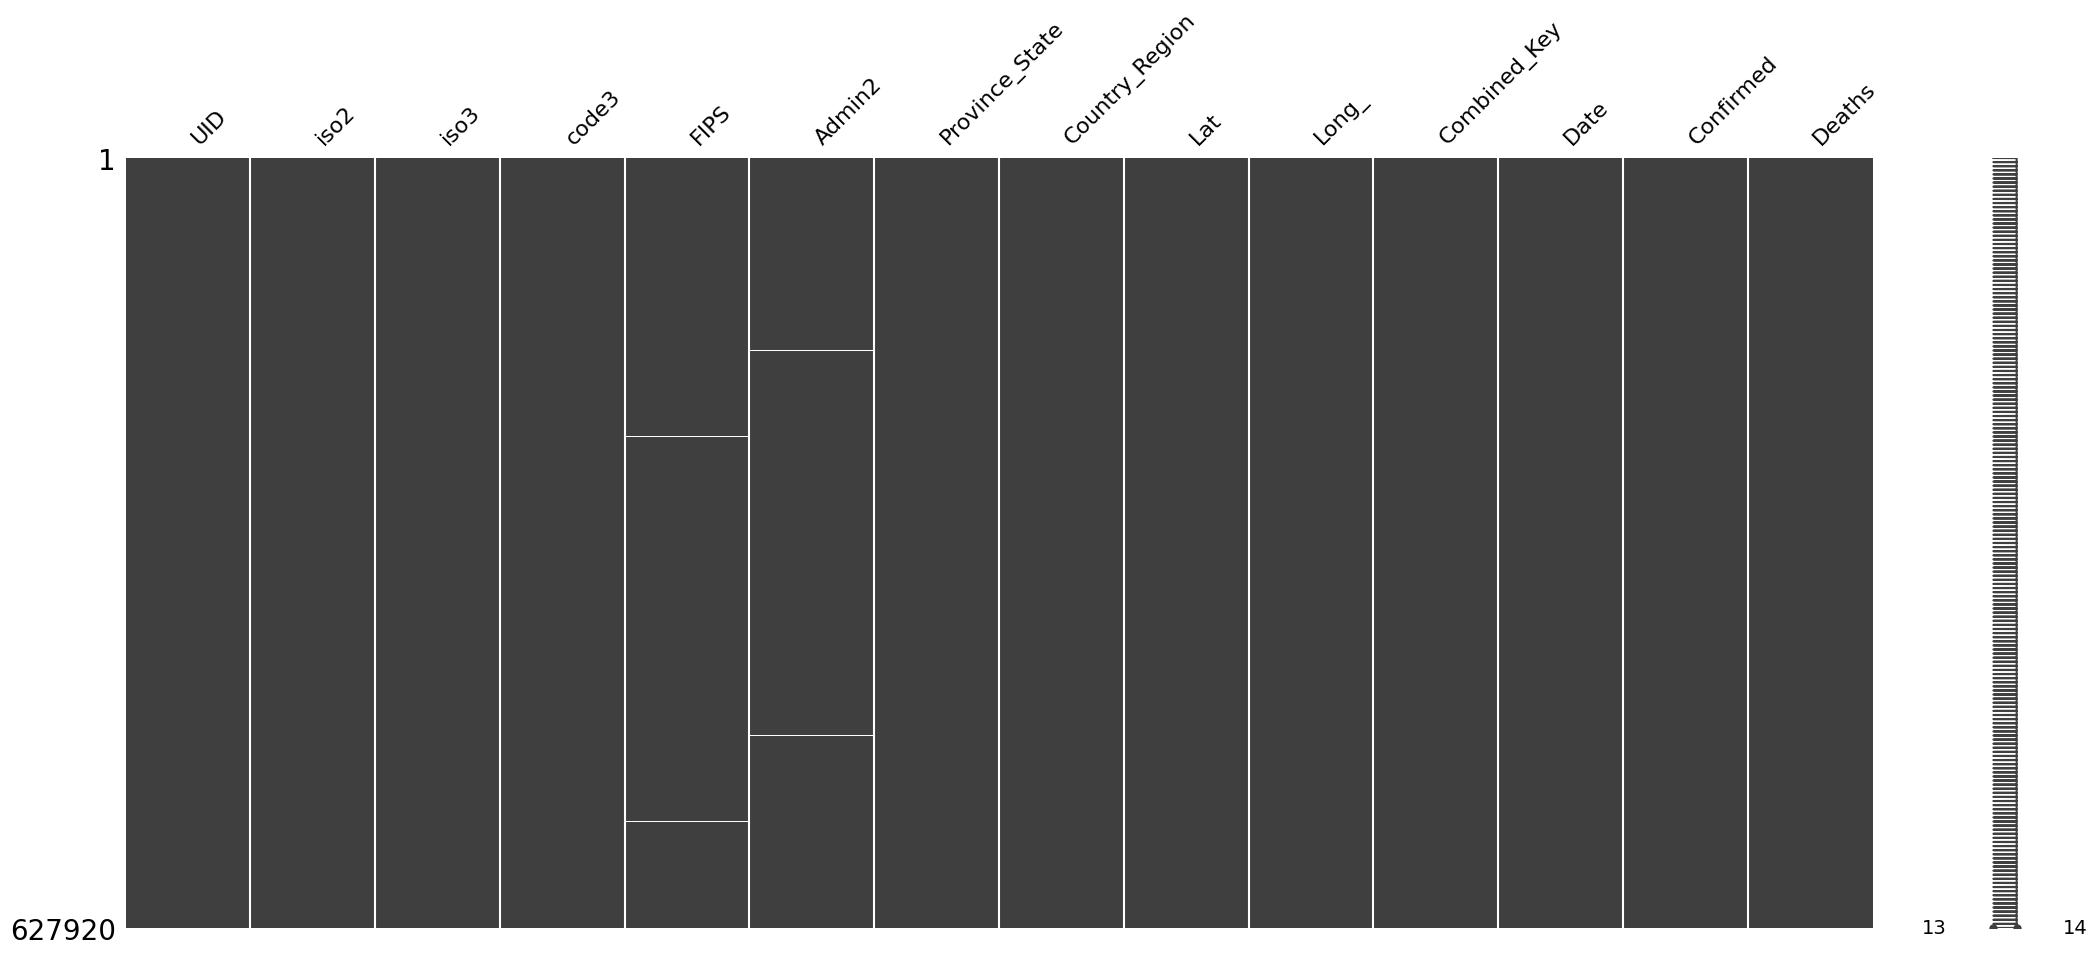

In [ ]:
import missingno
missingno.matrix(data_4)

In [ ]:
data_4.dropna(inplace=True)

In [ ]:
data_4.isnull().sum()

,0
UID,0
iso2,0
iso3,0
code3,0
FIPS,0
Admin2,0
Province_State,0
Country_Region,0
Lat,0
Long_,0


<Axes: >

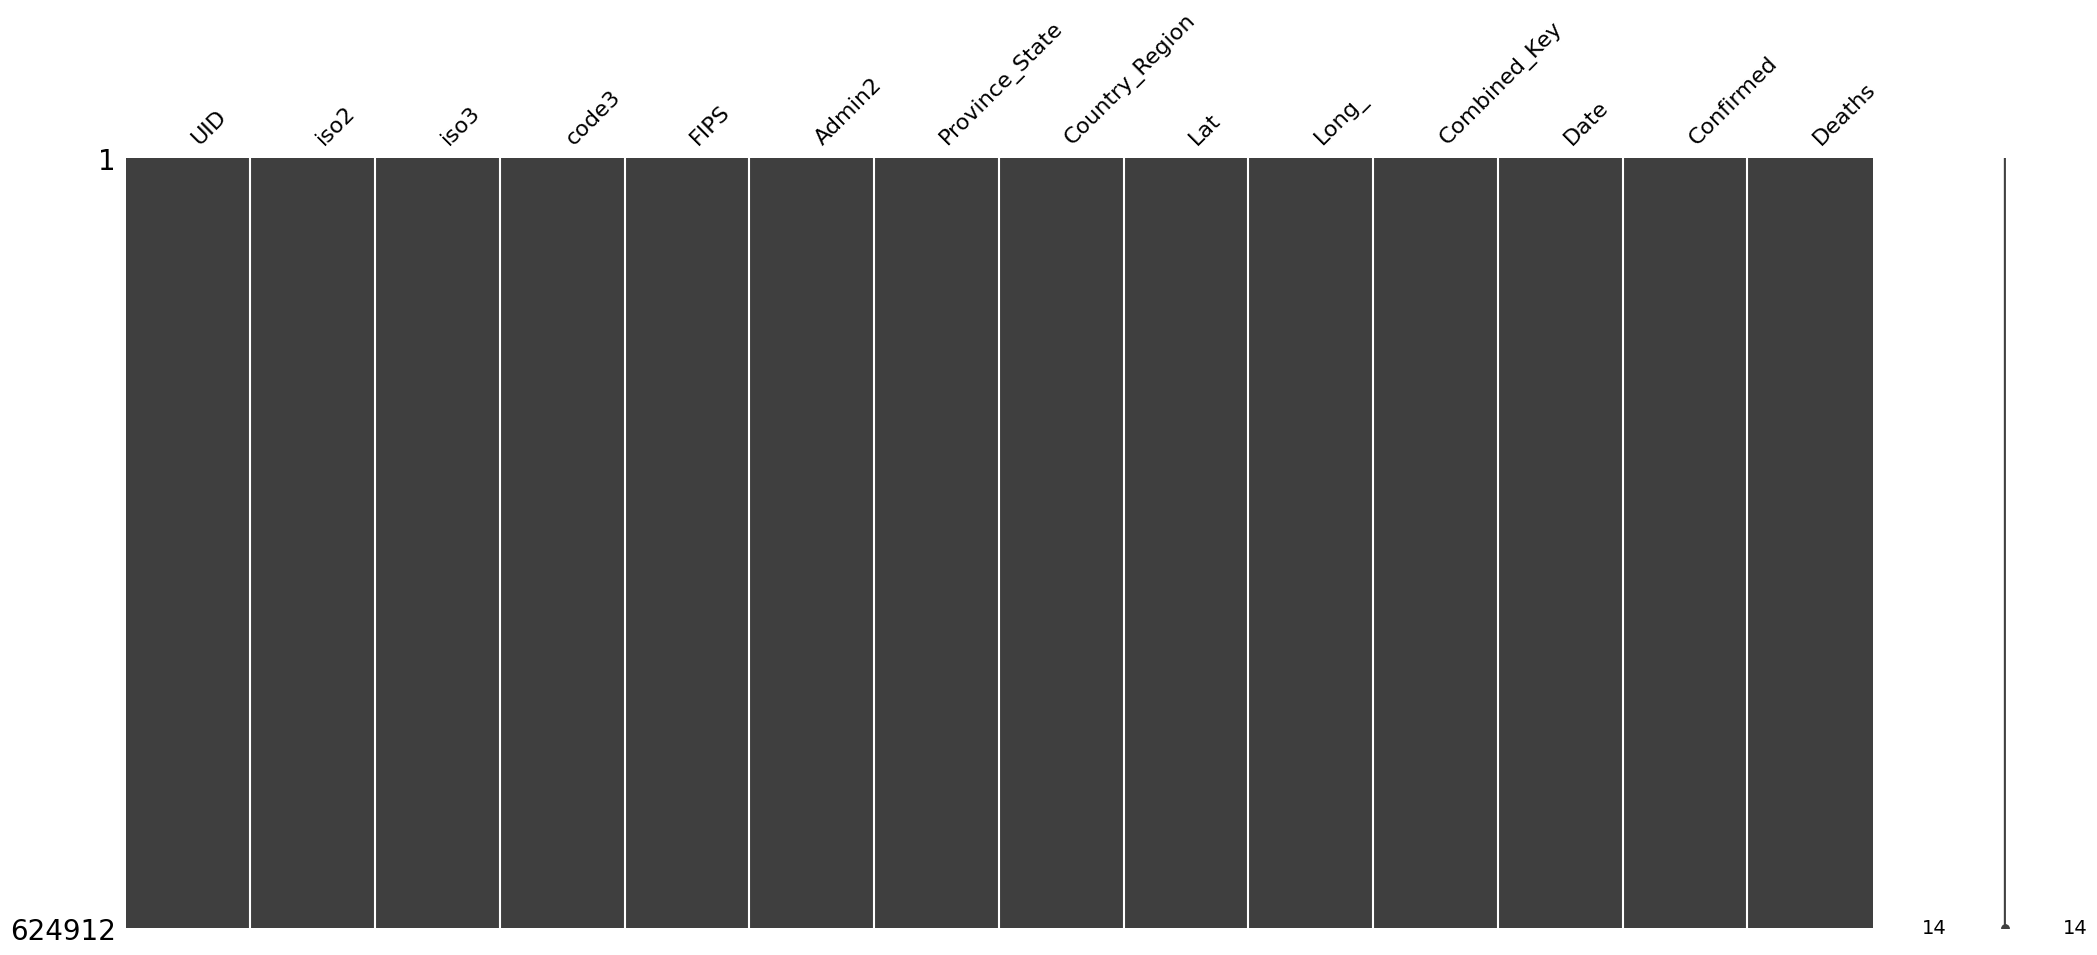

In [ ]:
import missingno
missingno.matrix(data_4)

In [ ]:
data_4.shape
#(627920, 14) shape aafter drop null value

(624912, 14)

In [ ]:
data_4.duplicated().sum()

0

In [ ]:
# data_4 is clean

# Data_4 visualization

In [ ]:
# Now create the choropleth map
fig = px.choropleth(usa_grouped,
                    color='Confirmed',
                    locations='Province_State',  # Changed to 'Province_State'
                    locationmode="USA-states",
                    scope="usa",
                    color_continuous_scale="RdGy",
                    title='No. of cases in USA')
fig.show() # Use fig.show() to display the figure

# Data_5 info

In [ ]:
data_5.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [ ]:
data_5.tail()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,801.0,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe
208,Western Sahara,Africa,598682.0,10,NaN,1.0,NaN,8.0,NaN,1.0,NaN,17.0,2.0,NaN,NaN,Africa


In [ ]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [ ]:
data_5.shape

(209, 16)

In [ ]:
data_5.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,2.080000e+02,2.090000e+02,4.000000,188.000000,3.000000,2.050000e+02,3.000000,2.050000e+02,122.000000,208.000000,187.000000,1.910000e+02,191.000000
mean,3.041549e+07,9.171850e+04,1980.500000,3792.590426,300.000000,5.887898e+04,1706.000000,2.766433e+04,534.393443,3196.024038,98.681176,1.402405e+06,83959.366492
std,1.047661e+08,4.325867e+05,3129.611424,15487.184877,451.199512,2.566984e+05,2154.779803,1.746327e+05,2047.518613,5191.986457,174.956862,5.553367e+06,152730.591240
min,8.010000e+02,1.000000e+01,20.000000,1.000000,1.000000,7.000000e+00,42.000000,0.000000e+00,1.000000,3.000000,0.080000,6.100000e+01,4.000000
25%,9.663140e+05,7.120000e+02,27.500000,22.000000,40.500000,3.340000e+02,489.000000,8.600000e+01,3.250000,282.000000,6.000000,2.575200e+04,8956.500000
50%,7.041972e+06,4.491000e+03,656.000000,113.000000,80.000000,2.178000e+03,936.000000,8.990000e+02,27.500000,1015.000000,29.000000,1.357020e+05,32585.000000
75%,2.575614e+07,3.689600e+04,2609.000000,786.000000,449.500000,2.055300e+04,2538.000000,7.124000e+03,160.250000,3841.750000,98.000000,7.576960e+05,92154.500000
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000


In [ ]:
data_5.isnull().sum()

,0
Country/Region,0
Continent,1
Population,1
TotalCases,0
NewCases,205
TotalDeaths,21
NewDeaths,206
TotalRecovered,4
NewRecovered,206
ActiveCases,4


<Axes: >

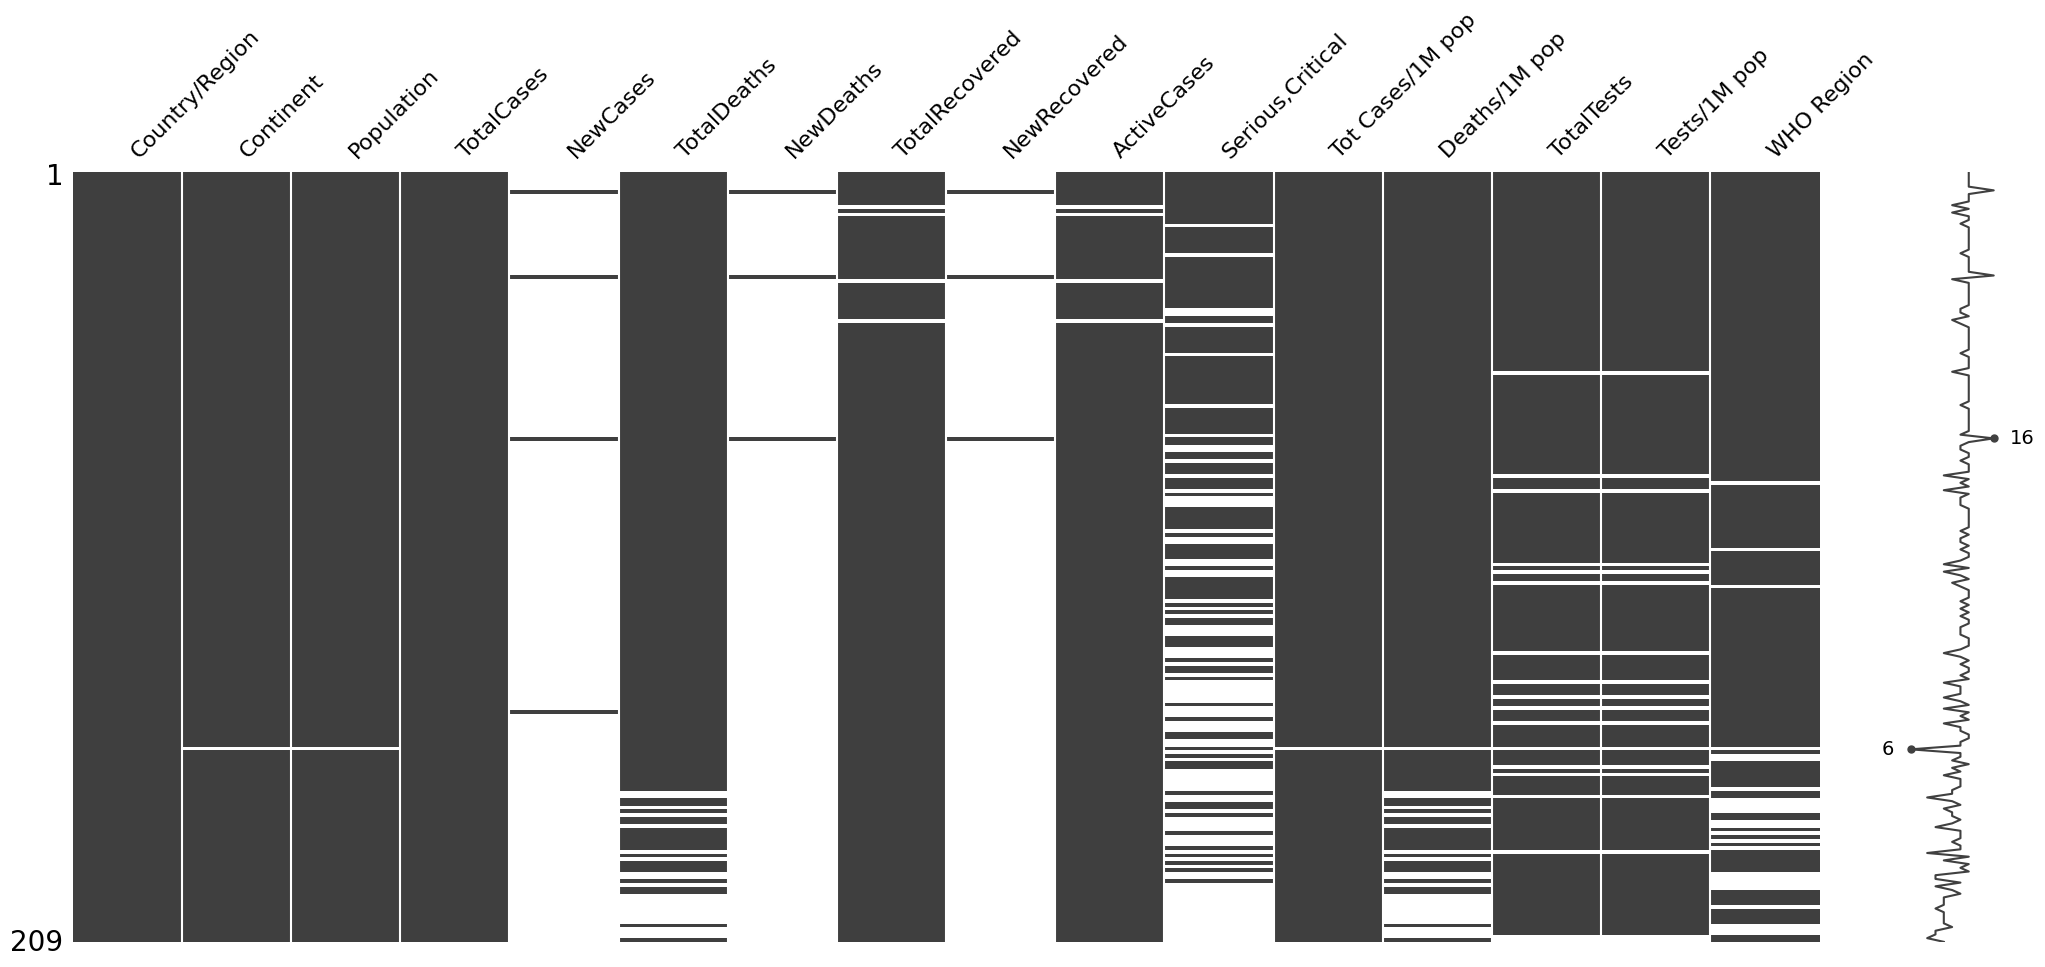

In [ ]:
missingno.matrix(data_5)

In [ ]:
data_5.duplicated().sum()

0

In [ ]:
def plot_hbar_wm(col, n, min_pop=1000000, sort='descending'):
    df = data_5[data_5['Population']>min_pop]
    df = df.sort_values(col, ascending=True).tail(n)
    fig = px.bar(df,
                 x=col, y="Country/Region", color='WHO Region',
                 text=col, orientation='h', width=700,
                 color_discrete_sequence = px.colors.qualitative.Dark2)
    fig.update_layout(title=col+' (Only countries with > 1M Pop)',
                      xaxis_title="", yaxis_title="",
                      yaxis_categoryorder = 'total ascending',
                      uniformtext_minsize=8, uniformtext_mode='hide')
    fig.show()

# Data_6 info

In [ ]:
data_6.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [ ]:
data_6.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [ ]:
data_6.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [ ]:
data_6.shape

(35156, 10)

In [ ]:
data_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [ ]:
data_6.isnull().sum()

,0
Date,0
Country/Region,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
WHO Region,0


In [ ]:
data_6.duplicated().sum()

0

In [ ]:
#data_6 is clean

# Data_6 visualization